<a href="https://colab.research.google.com/github/mattoble/Time-Series-Analysis-Forecasting/blob/main/Time_Series_Region_IV_A_CALABARZON_Decomposition%2CAnalysis%26Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Historical Number of Enrollment in Region IV-A CALABARZON (Elementary)

## Data Preparation

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [46]:
data_path = "/content/Historical-Number-of-Enrollment-in-REGION-IV-A-Elementary.csv"

data = pd.read_csv(data_path)
data.head()

,Region IV-A - CALABARZON,Kindergarten,Unnamed: 2,Unnamed: 3,Grade 1,Unnamed: 5,Unnamed: 6,Grade 2,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Grade 5,Unnamed: 17,Unnamed: 18,Grade 6,Unnamed: 20,Unnamed: 21,Total Elementary (K to 6),Unnamed: 23,Unnamed: 24
0,NaN,Male,Female,Total,Male,Female,Total,Male,Female,Total,...,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total
1,2010-2011,"108,815","104,451","213,266","190,351","165,691","356,042","159,455","145,396","304,851",...,"287,160","139,836","136,012","275,848","130,569","127,458","258,027","1,029,362","962,231","1,991,593"
2,2011-2012,"130,761","127,186","257,947","204,163","175,093","379,256","164,567","149,666","314,233",...,"296,236","146,183","140,431","286,614","136,239","135,341","271,580","1,090,319","1,016,796","2,107,115"
3,2012-2013,"143,794","138,836","282,630","205,252","174,923","380,175","176,224","158,172","334,396",...,"298,558","148,833","143,253","292,086","142,770","140,062","282,832","1,131,115","1,048,387","2,179,502"
4,2013-2014,"152,169","146,945","299,114","179,757","160,702","340,459","187,309","163,888","351,197",...,"300,072","148,262","141,075","289,337","143,509","140,583","284,092","1,133,567","1,052,175","2,185,742"


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0    Region IV-A - CALABARZON    11 non-null     object
 1    Kindergarten                12 non-null     object
 2   Unnamed: 2                   12 non-null     object
 3   Unnamed: 3                   12 non-null     object
 4    Grade 1                     12 non-null     object
 5   Unnamed: 5                   12 non-null     object
 6   Unnamed: 6                   12 non-null     object
 7    Grade 2                     12 non-null     object
 8   Unnamed: 8                   12 non-null     object
 9   Unnamed: 9                   12 non-null     object
 10   Grade 3                     12 non-null     object
 11  Unnamed: 11                  12 non-null     object
 12  Unnamed: 12                  12 non-null     object
 13   Grade 4                     12 non-n

In [48]:
data.drop(index=0, inplace=True)

Dropped index 0 which contains unrecognized column headers.

In [49]:
for col in data.columns[1:]:
    data[col] = data[col].str.replace(",", "").astype(int)

Convert objects into integer data type.

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 1 to 11
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0    Region IV-A - CALABARZON    11 non-null     object
 1    Kindergarten                11 non-null     int64 
 2   Unnamed: 2                   11 non-null     int64 
 3   Unnamed: 3                   11 non-null     int64 
 4    Grade 1                     11 non-null     int64 
 5   Unnamed: 5                   11 non-null     int64 
 6   Unnamed: 6                   11 non-null     int64 
 7    Grade 2                     11 non-null     int64 
 8   Unnamed: 8                   11 non-null     int64 
 9   Unnamed: 9                   11 non-null     int64 
 10   Grade 3                     11 non-null     int64 
 11  Unnamed: 11                  11 non-null     int64 
 12  Unnamed: 12                  11 non-null     int64 
 13   Grade 4                     11 non-n

In [51]:
data.columns

Index([' Region IV-A - CALABARZON ', ' Kindergarten ', 'Unnamed: 2',
       'Unnamed: 3', ' Grade 1 ', 'Unnamed: 5', 'Unnamed: 6', ' Grade 2 ',
       'Unnamed: 8', 'Unnamed: 9', ' Grade 3 ', 'Unnamed: 11', 'Unnamed: 12',
       ' Grade 4 ', 'Unnamed: 14', 'Unnamed: 15', ' Grade 5 ', 'Unnamed: 17',
       'Unnamed: 18', ' Grade 6 ', 'Unnamed: 20', 'Unnamed: 21',
       ' Total Elementary (K to 6) ', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [52]:
data.rename(columns={" Region IV-A - CALABARZON " : "School Year",
             " Kindergarten " : "Kindergarten (Male)",
             "Unnamed: 2": "Kindergarten (Female)",
             "Unnamed: 3" : "Kindergarten Total",
             " Grade 1 " : "Grade 1 (Male)",
             "Unnamed: 5" : "Grade 1 (Female)",
             "Unnamed: 6" : "Grade 1 Total",
             " Grade 2 " : "Grade 2 (Male)",
             "Unnamed: 8" : "Grade 2 (Female)",
             "Unnamed: 9" : "Grade 2 Total",
             " Grade 3 " : "Grade 3 (Male)",
             "Unnamed: 11" : "Grade 3 (Female)",
             "Unnamed: 12" : "Grade 3 Total",
             " Grade 4 " : "Grade 4 (Male)",
             "Unnamed: 14" : "Grade 4 (Female)",
             "Unnamed: 15" : "Grade 4 Total",
             " Grade 5 " : "Grade 5 (Male)",
             "Unnamed: 17" : "Grade 5 (Female)",
             "Unnamed: 18" : "Grade 5 Total",
             " Grade 6 " : "Grade 6 (Male)",
             "Unnamed: 20" : "Grade 6 (Female)",
             "Unnamed: 21" : "Grade 6 Total",
             " Total Elementary (K to 6) " : "Total Elementary (Male)",
             "Unnamed: 23" : "Total Elementary (Female)",
             "Unnamed: 24" : "Total Elementary"}, inplace=True)
data.head()

,School Year,Kindergarten (Male),Kindergarten (Female),Kindergarten Total,Grade 1 (Male),Grade 1 (Female),Grade 1 Total,Grade 2 (Male),Grade 2 (Female),Grade 2 Total,...,Grade 4 Total,Grade 5 (Male),Grade 5 (Female),Grade 5 Total,Grade 6 (Male),Grade 6 (Female),Grade 6 Total,Total Elementary (Male),Total Elementary (Female),Total Elementary
1,2010-2011,108815,104451,213266,190351,165691,356042,159455,145396,304851,...,287160,139836,136012,275848,130569,127458,258027,1029362,962231,1991593
2,2011-2012,130761,127186,257947,204163,175093,379256,164567,149666,314233,...,296236,146183,140431,286614,136239,135341,271580,1090319,1016796,2107115
3,2012-2013,143794,138836,282630,205252,174923,380175,176224,158172,334396,...,298558,148833,143253,292086,142770,140062,282832,1131115,1048387,2179502
4,2013-2014,152169,146945,299114,179757,160702,340459,187309,163888,351197,...,300072,148262,141075,289337,143509,140583,284092,1133567,1052175,2185742
5,2014-2015,148824,143186,292010,174377,158105,332482,171038,154111,325149,...,319659,152271,144664,296935,145743,140395,286138,1148988,1058846,2201004


Renamed columns headers for clarity.

In [53]:
from datetime import date

data["School Year"] = data["School Year"].str[:4]
data["School Year"] = pd.to_datetime(data["School Year"], format="%Y")
data.head()

,School Year,Kindergarten (Male),Kindergarten (Female),Kindergarten Total,Grade 1 (Male),Grade 1 (Female),Grade 1 Total,Grade 2 (Male),Grade 2 (Female),Grade 2 Total,...,Grade 4 Total,Grade 5 (Male),Grade 5 (Female),Grade 5 Total,Grade 6 (Male),Grade 6 (Female),Grade 6 Total,Total Elementary (Male),Total Elementary (Female),Total Elementary
1,2010-01-01,108815,104451,213266,190351,165691,356042,159455,145396,304851,...,287160,139836,136012,275848,130569,127458,258027,1029362,962231,1991593
2,2011-01-01,130761,127186,257947,204163,175093,379256,164567,149666,314233,...,296236,146183,140431,286614,136239,135341,271580,1090319,1016796,2107115
3,2012-01-01,143794,138836,282630,205252,174923,380175,176224,158172,334396,...,298558,148833,143253,292086,142770,140062,282832,1131115,1048387,2179502
4,2013-01-01,152169,146945,299114,179757,160702,340459,187309,163888,351197,...,300072,148262,141075,289337,143509,140583,284092,1133567,1052175,2185742
5,2014-01-01,148824,143186,292010,174377,158105,332482,171038,154111,325149,...,319659,152271,144664,296935,145743,140395,286138,1148988,1058846,2201004


Converted School Year column into Python date.

In [54]:
data_total = data[["School Year", "Total Elementary"]]
data_total.set_index("School Year", inplace=True)
display(data_total)

,Total Elementary
School Year,
2010-01-01,1991593
2011-01-01,2107115
2012-01-01,2179502
2013-01-01,2185742
2014-01-01,2201004
2015-01-01,2173848
2016-01-01,2147640
2017-01-01,2164851
2018-01-01,2184758


Extracted School Year and Total Elementary columns for modeling purposes.

<Axes: xlabel='School Year'>

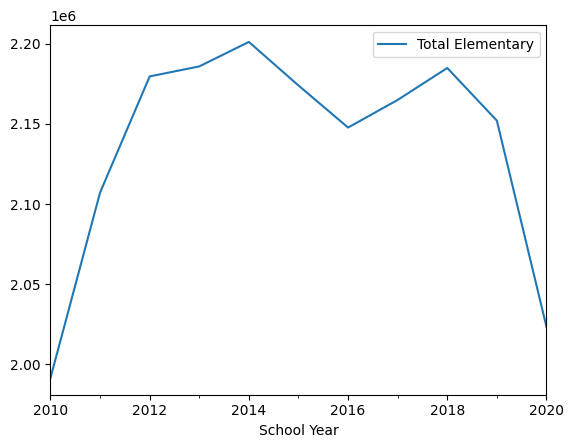

In [55]:
data_total.plot()

In [56]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2010-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Total Elementary  11 non-null     int64
dtypes: int64(1)
memory usage: 176.0 bytes


## Time Series Decomposition and Analysis

A method to break down time series into separate components composed of trend, seasonality, and residuals. The purpose of this is to better understand the underlying patterns and improve forecasting accuracy [(DataCamp, 2025)](https://www.datacamp.com/tutorial/time-series-decomposition).

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_total, model="additive")

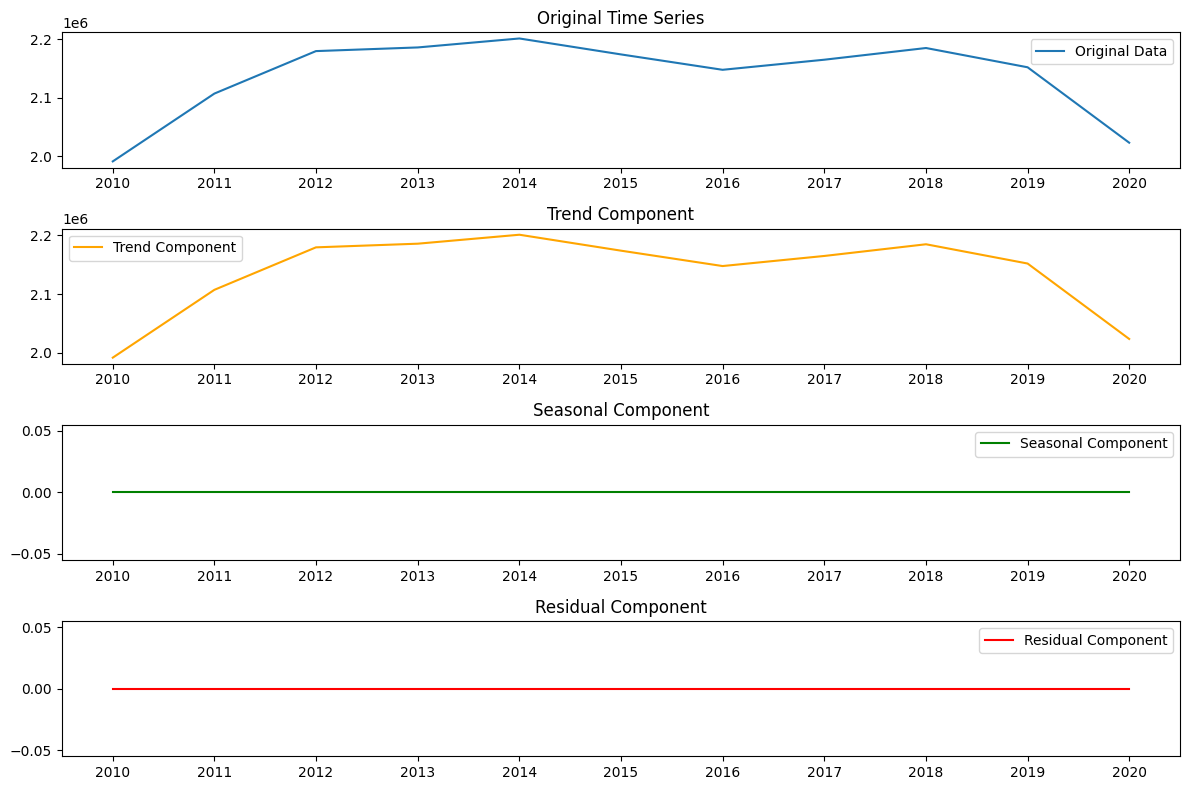

In [58]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data_total["Total Elementary"], label="Original Data")
plt.title("Original Time Series")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend Component", color="orange")
plt.title("Trend Component")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonal Component", color="green")
plt.title("Seasonal Component")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residual Component", color="red")
plt.title("Residual Component")
plt.legend()

plt.tight_layout()
plt.show()

### Observations

**Trend Component**
*   The trend line is not a straight line. It"s a complex curve.
*   A period of growth from 2010 to 2014.
*   A period of plateau from 2014 to 2016. This may be caused by the K-12 rollout back in 2016.
*   A sharp decline from 2018 to 2020.

**Seasonal Component**
*   The seasonal component is a perfectly flat line at zero.

**Residual Component**
*   The residual component is also a flat line at or very close to zero.







### Findings

*   The data is trend-dominant. The Trend Component is nearly identical to the Original Data, meaning almost all the variation in enrollment numbers is explained by its long-term movement, not by random noise. The trend is also distinctly non-linear.
*   There is no seasonality in the yearly data. A seasonal pattern requires a repeating cycle within a year (e.g., monthly or quarterly), which is impossible with annual data points.
*   There is very little unexplained "noise" or randomness left in the data. This reinforces the conclusion that the series is trend-dominant.
*   A trend-focused model is required such as **Prophet** which excels at fitting non-linear trends and **ARIMA** which uses differencing in handling trend. ARIMA is also suitable because of its non-seasonal nature.
*   The data is non-stationary, it is recommended to perform **Augmented Dickey-Fuller (ADF)** test to prove the non-stationarity and determine the necessary level of differencing (d) for the ARIMA model.





### Augmented Dickey-Fuller (ADF) Test

To determine if a time series is stationary.

**Null Hypothesis (H₀)**: The time series is non-stationary. (p-value > 0.05)

**Alternative Hypothesis (H₁)**: The time series is stationary. (p-value < 0.05)

In [59]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(data_total["Total Elementary"])
print(f"ADF Statistic: {adf[0]}")
print(f"p-value: {adf[1]}")

ADF Statistic: -2.490028871136372
p-value: 0.11791929631588605


 Since 0.1179 > 0.05, the test fail to reject the null hypothesis. The test provides strong statistical evidence that the *Total Elementary* enrollment series is **non-stationary**.

For the ARIMA(p,d,q) model, this result signifies that the differencing parameter, *d* must be at least 1.

### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

Now that the *d* value is estimated, the ACF and PACF plots get initial estimates for the *p* (AR term) and *`q`* (MA term) of the ARIMA model.

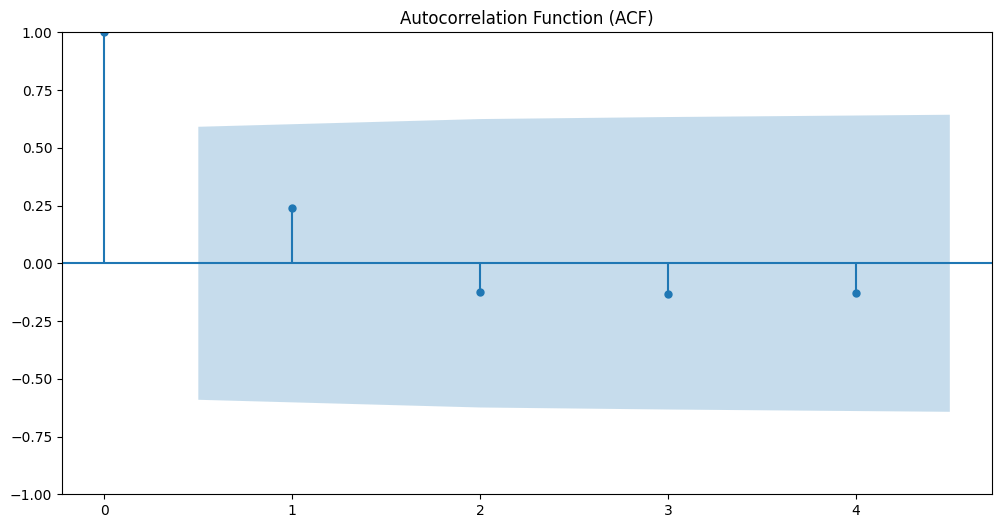

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(data_total, lags=4, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")
plt.show()

The ACF plot shows a slow decay. The correlation at lag 1 is very high, and the subsequent correlations at lags 2, 3, and 4 decrease, but not abruptly. This plot visually confirms the result of your ADF test (p-value = 0.1179).

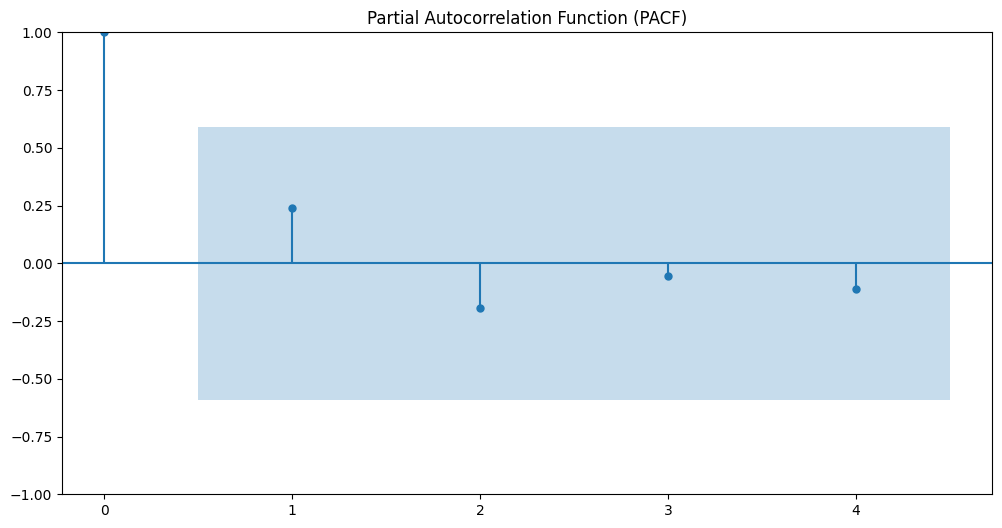

In [61]:
plt.figure(figsize=(12, 6))
plot_pacf(data_total["Total Elementary"], lags=4, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

The PACF plot shows a very different and much clearer pattern. There is one large, statistically significant spike at lag 1. After lag 1, all subsequent spikes at lags 2, 3, and 4 fall inside the shaded confidence interval, meaning they are not statistically different from zero. This plot provides a strong initial estimate for the p parameter: p = 1.

Since the PACF shows a clear AR signature, we start with the simplest assumption for the Moving Average component, which is q = 0. So, the first proposed model is ARIMA (1,1,0).

### Differencing

Differencing stabilizes the mean of the time series by removing the trend.

In [62]:
data_total["diff_1"] = data_total["Total Elementary"].diff()
data_total["diff_2"] = data_total["diff_1"].diff()
data_total

,Total Elementary,diff_1,diff_2
School Year,,,
2010-01-01,1991593,NaN,NaN
2011-01-01,2107115,115522.0,NaN
2012-01-01,2179502,72387.0,-43135.0
2013-01-01,2185742,6240.0,-66147.0
2014-01-01,2201004,15262.0,9022.0
2015-01-01,2173848,-27156.0,-42418.0
2016-01-01,2147640,-26208.0,948.0
2017-01-01,2164851,17211.0,43419.0
2018-01-01,2184758,19907.0,2696.0


* **diff_1 (First-Order Difference)**: This column represents the change or growth in enrollment from one year to the next. It effectively removes a linear trend.

* **diff_2 (Second-Order Difference)**: This column represents the change in the change, or the acceleration/deceleration of enrollment growth. It is designed to remove a changing or curved trend.

In [63]:
adf = adfuller(data_total["diff_1"].dropna())
print("diff_1 ADF Test")
print(f"ADF Statistic: {adf[0]}")
print(f"p-value: {adf[1]}")

diff_1 ADF Test
ADF Statistic: -1.764834829827659
p-value: 0.39805461701528344


In [64]:
adf = adfuller(data_total["diff_2"].dropna())
print("diff_2 ADF Test")
print(f"ADF Statistic: {adf[0]}")
print(f"p-value: {adf[1]}")

diff_2 ADF Test
ADF Statistic: -1.4175793762224196
p-value: 0.5738199339609928


The test on the first-differenced series yielded a p-value of 0.398, and the test on the second-differenced series yielded a p-value of 0.573. Neither test provided statistical evidence of stationarity at the 0.05 significance level.

This counter-intuitive result is likely due to the combination of a very small sample size (N=9 after two differences) and the presence of significant structural breaks in the data. Under these conditions, the ADF test is known to have low statistical power.

Therefore, a purely statistical determination of *d* is unreliable. Instead, a pragmatic approach based on visual analysis and model comparison was adopted. Visual inspection of the original data's decomposition plot clearly showed a curved, non-linear trend, for which second-order differencing (d = 2) is the standard theoretical choice.

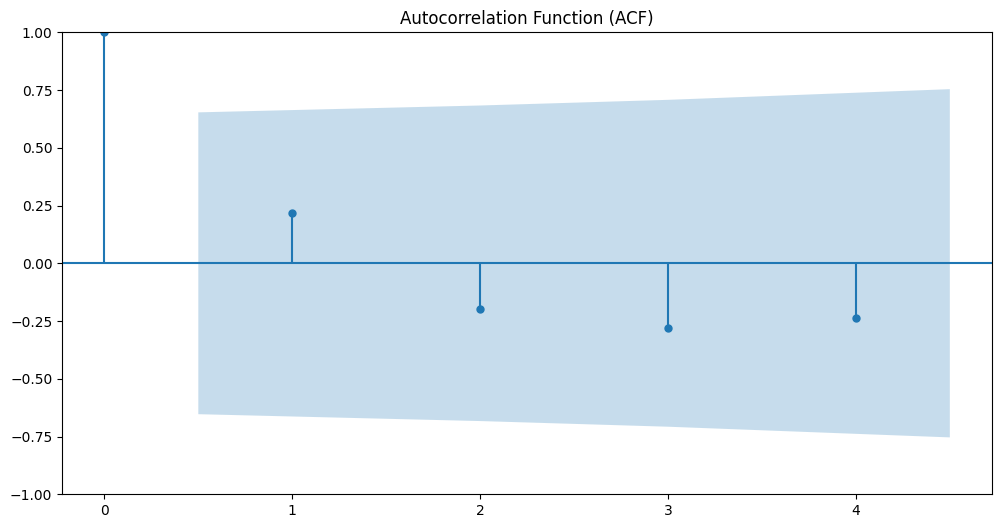

In [65]:
plt.figure(figsize=(12, 6))
plot_acf(data_total["diff_2"].dropna(), lags=4, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")
plt.show()

A spike is only considered statistically significant if it goes outside the confidence interval. Since no spikes are significant, it indicates that there is no significant correlation left to be modeled by a MA component.

This plot strongly suggests that the appropriate value for the MA parameter is q = 0.

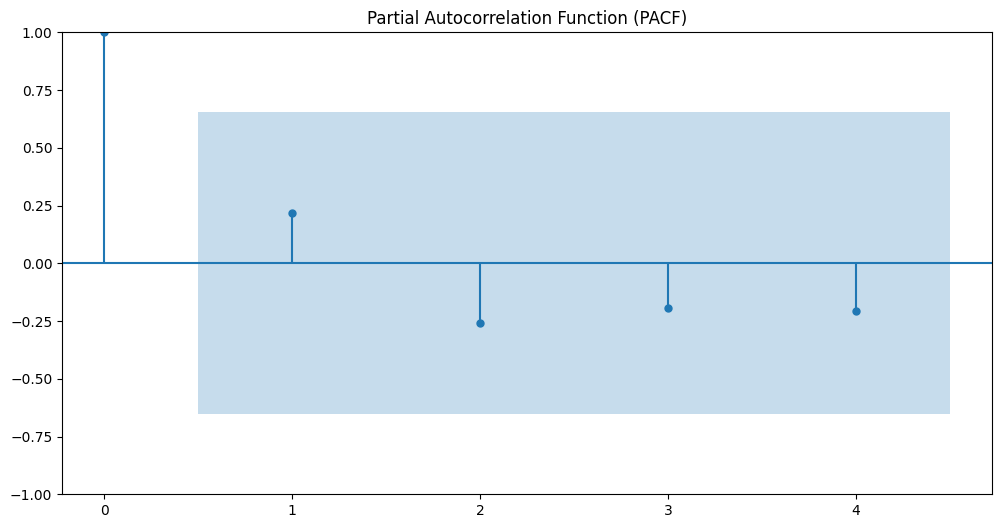

In [66]:
plt.figure(figsize=(12, 6))
plot_pacf(data_total["diff_2"].dropna(), lags=4, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

The PACF plot shows the exact same pattern as the ACF plot. There are no statistically significant spikes at any lag after lag 0.

This plot strongly suggests that the appropriate value for the AR parameter is p = 0. With that being said, the second proposed model is ARIMA(0,2,0).

### ARIMA Parameter Tuning

ARIMA is a widely used statistical method for time series forecasting. It models the next value in a time series based on linear combination of its own past values and past forecast errors. The model parameters include the order of autoregression (p), differencing (d), and moving average (q) [(GeeksForGeeks, 2024)](https://www.geeksforgeeks.org/machine-learning/time-series-analysis-and-forecasting/#what-is-time-series-forecasting).

#### First Proposed Model - ARIMA(1,1,0)

In [67]:
data_arima = data_total.iloc[:,0]
data_prophet = data_arima.copy()

In [68]:
from statsmodels.tsa.arima.model import ARIMA

model_0 = ARIMA(data_arima, order=(1, 1, 0))
model_0_fit = model_0.fit()

print("First Proposed Model - ARIMA(1,1,0)")
print(model_0_fit.summary())

First Proposed Model - ARIMA(1,1,0)
                               SARIMAX Results                                
Dep. Variable:       Total Elementary   No. Observations:                   11
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -122.222
Date:                Mon, 30 Jun 2025   AIC                            248.443
Time:                        21:41:16   BIC                            249.049
Sample:                    01-01-2010   HQIC                           247.780
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0609      0.140      0.437      0.662      -0.213       0.334
sigma2      1.994e+09   1.67e-11   1.19e+20      0.000    1.99e+09    1.99e+09
Ljung-Box (L1) (

#### Second Proposed Model - ARIMA(0,2,0)

In [69]:
model_1 = ARIMA(data_arima, order=(0, 2, 0))
model_1_fit = model_1.fit()

print("First Proposed Model - ARIMA(0,2,0)")
print(model_1_fit.summary())

First Proposed Model - ARIMA(0,2,0)
                               SARIMAX Results                                
Dep. Variable:       Total Elementary   No. Observations:                   11
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -110.133
Date:                Mon, 30 Jun 2025   AIC                            222.265
Time:                        21:41:16   BIC                            222.463
Sample:                    01-01-2010   HQIC                           221.840
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.995e+09   9.57e+08      2.085      0.037    1.19e+08    3.87e+09
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 0.36
Prob(Q):   

*   LLjung-Box Prob(Q): 0.58 (> 0.05) -> The model's errors are random and uncorrelated. (Good)
*   Jarque-Bera Prob(JB): 0.83 (> 0.05) -> The model's errors are normally distributed. (Good)
*   Heteroskedasticity Prob(H): 0.61 (> 0.05) -> The variance of the errors is stable. (Good)



### Comparison of ARIMA(p,d,q) using Akaike Information Criterion (AIC)

AIC is a measure of goodness of fit of a statistical model. It is grounded in the concept of information entropy in between bias and variance in model construction or between accuracy and complexity of the model [(Ullah, 2024)](https://itfeature.com/regression/selection/akaike-information-criteria/).

Based on the two summaries, the **ARIMA(0,2,0)** model is superior to the ARIMA(1,1,0) model for the dataset. It is both a better fit and a more appropriate model.

The model with the lower AIC is considered better because it represents the best trade-off between model fit and model complexity.

## Time Series Forecasting

Time Series Forecasting is a statistical technique used to predict future values of a time series based on past observations [((GeeksForGeeks, 2024)](https://www.geeksforgeeks.org/machine-learning/time-series-analysis-and-forecasting/#what-is-time-series-forecasting).

### Split data

Split the data into training and testing sets to evaluate model performance on unseen data.

In [70]:
train_size = int(len(data_arima) * 0.8) # 80% of dataset is used for training
train_arima, test_arima = data_arima[0:train_size], data_arima[train_size:]
train_prophet, test_prophet = data_prophet[0:train_size], data_prophet[train_size:]

In [71]:
print("ARIMA Training Data:")
display(train_arima)
print("\nARIMA Testing Data:")
display(test_arima)

ARIMA Training Data:


,Total Elementary
School Year,
2010-01-01,1991593
2011-01-01,2107115
2012-01-01,2179502
2013-01-01,2185742
2014-01-01,2201004
2015-01-01,2173848
2016-01-01,2147640
2017-01-01,2164851



ARIMA Testing Data:


,Total Elementary
School Year,
2018-01-01,2184758
2019-01-01,2151930
2020-01-01,2023434


In [72]:
print("\nProphet Training Data:")
display(train_prophet)
print("\nProphet Testing Data:")
display(test_prophet)


Prophet Training Data:


,Total Elementary
School Year,
2010-01-01,1991593
2011-01-01,2107115
2012-01-01,2179502
2013-01-01,2185742
2014-01-01,2201004
2015-01-01,2173848
2016-01-01,2147640
2017-01-01,2164851



Prophet Testing Data:


,Total Elementary
School Year,
2018-01-01,2184758
2019-01-01,2151930
2020-01-01,2023434


### Fit ARIMA(0,2,0) Model

Fit the ARIMA model to the training data.

In [73]:
arima_model = ARIMA(train_arima, order=(0, 2, 0))
arima_model_fitted = arima_model.fit()

print(arima_model_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:       Total Elementary   No. Observations:                    8
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -72.354
Date:                Mon, 30 Jun 2025   AIC                            146.707
Time:                        21:41:16   BIC                            146.499
Sample:                    01-01-2010   HQIC                           145.874
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.25e+09   8.43e+08      1.484      0.138   -4.01e+08     2.9e+09
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.46
Prob(Q):                              1.00   Pr

### Fit Prophet Model

Fit the Prophet model to the training data.

In [74]:
from prophet import Prophet

train_prophet_prepared = train_prophet.reset_index().rename(columns={"School Year": "ds", "Total Elementary": "y"})

model_prophet = Prophet()
model_prophet_fitted = model_prophet.fit(train_prophet_prepared)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ikho2ux/vyn03moo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ikho2ux/12exovcp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35252', 'data', 'file=/tmp/tmp6ikho2ux/vyn03moo.json', 'init=/tmp/tmp6ikho2ux/12exovcp.json', 'output', 'file=/tmp/tmp6ikho2ux/prophet_modelre88d6ku/prophet_model-20250630214117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

### Model Predictions

Generate predictions for the test set using both the fitted ARIMA and Prophet models.

In [75]:
arima_predictions = arima_model_fitted.predict(start=len(train_arima), end=len(data_arima)-1)

print("ARIMA Predictions:")
print(arima_predictions)

ARIMA Predictions:
2018-01-01    2182062.0
2019-01-01    2199273.0
2020-01-01    2216484.0
Freq: YS-JAN, Name: predicted_mean, dtype: float64


The ARIMA model predicts a steady, almost perfectly linear increase in enrollment from 2018 through 2020.

In [76]:
future = model_prophet_fitted.make_future_dataframe(periods=len(test_prophet), freq="YS")
prophet_forecast = model_prophet_fitted.predict(future)
prophet_predictions = prophet_forecast["yhat"]

print("\nProphet Predictions:")
print(prophet_predictions)


Prophet Predictions:
0     1.991504e+06
1     2.107027e+06
2     2.179415e+06
3     2.185652e+06
4     2.200915e+06
5     2.173761e+06
6     2.147554e+06
7     2.164762e+06
8     2.190296e+06
9     2.190055e+06
10    2.163848e+06
Name: yhat, dtype: float64


The Prophet model predicts a slight peak around 2018/2019 and then a significant decrease in enrollment into 2020.

In [77]:
data[["School Year", "Total Elementary"]].tail(3)

,School Year,Total Elementary
9,2018-01-01,2184758
10,2019-01-01,2151930
11,2020-01-01,2023434


Looking at the original data, enrollment did, in fact, decrease significantly from 2018 to 2020. This gives a strong indication that Prophet's forecasting was more aligned.

### Model Evaluation

Calculate evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE) for both models using the predictions and the actual values from the test set.

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse_arima = mean_squared_error(test_arima, arima_predictions)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test_arima, arima_predictions)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    non_zero_mask = y_true != 0
    y_true_filtered = y_true[non_zero_mask]
    y_pred_filtered = y_pred[non_zero_mask]

    if y_true_filtered.size == 0:
        return np.nan

    return np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100

mape_arima = mean_absolute_percentage_error(test_arima, arima_predictions)

print("ARIMA Model Evaluation Metrics:")
print(f"  MSE: {mse_arima:.2f}")
print(f"  RMSE: {rmse_arima:.2f}")
print(f"  MAE: {mae_arima:.2f}")
print(f"  MAPE: {mape_arima:.2f}%")

ARIMA Model Evaluation Metrics:
  MSE: 13172310188.33
  RMSE: 114770.69
  MAE: 81029.67
  MAPE: 3.95%


In [84]:
prophet_predictions_aligned = prophet_predictions.reset_index(drop=True)
test_prophet_reset_index = test_prophet.reset_index(drop=True)

mse_prophet = mean_squared_error(test_prophet_reset_index, prophet_predictions_aligned.iloc[len(train_prophet):])
rmse_prophet = np.sqrt(mse_prophet)
mae_prophet = mean_absolute_error(test_prophet_reset_index, prophet_predictions_aligned.iloc[len(train_prophet):])
mape_prophet = mean_absolute_percentage_error(test_prophet_reset_index, prophet_predictions_aligned.iloc[len(train_prophet):])

print("Prophet Model Evaluation Metrics:")
print(f"  MSE: {mse_prophet:.2f}")
print(f"  RMSE: {rmse_prophet:.2f}")
print(f"  MAE: {mae_prophet:.2f}")
print(f"  MAPE: {mape_prophet:.2f}%")

Prophet Model Evaluation Metrics:
  MSE: 7066805904.30
  RMSE: 84064.30
  MAE: 61359.22
  MAPE: 2.99%


#### Comparison of Evaluation Metrics

*   **MAE**: On average, Prophet's forecasts were off by about 61,000 students, while ARIMA's were off by about 81,000 students. Prophet was consistently closer to the true value.
*   **RMSE**: The lower RMSE for Prophet indicates that it not only had smaller average errors but also avoided the very large, inaccurate predictions that ARIMA made, particularly when the trend turned downwards sharply.
*   **MAPE**: A MAPE of 2.99% signifies that the Prophet model's forecasts were, on average, within 3% of the actual enrollment numbers.



### Actual vs. Predicted Values

Compare the actual and predicted values using both the ARIMA and Prophet models.

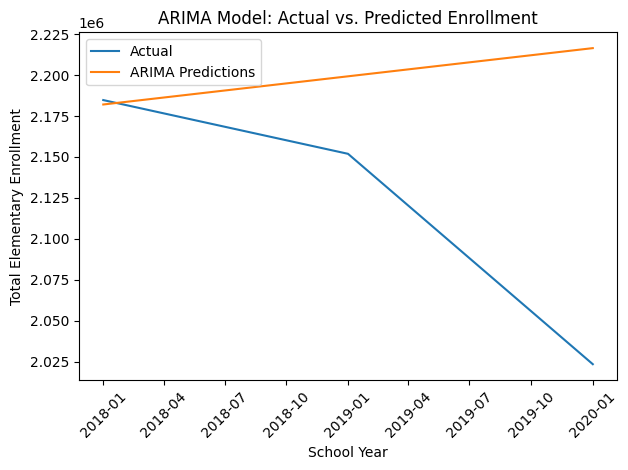

In [86]:
plt.plot(test_arima.index, test_arima, label="Actual")
plt.plot(arima_predictions.index, arima_predictions, label="ARIMA Predictions")
plt.title("ARIMA Model: Actual vs. Predicted Enrollment")
plt.xlabel("School Year")
plt.ylabel("Total Elementary Enrollment")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The ARIMA model completely failed to predict the trend reversal. It is a linear model by nature and has no built-in mechanism to forecast a turning point where the trend changes direction.

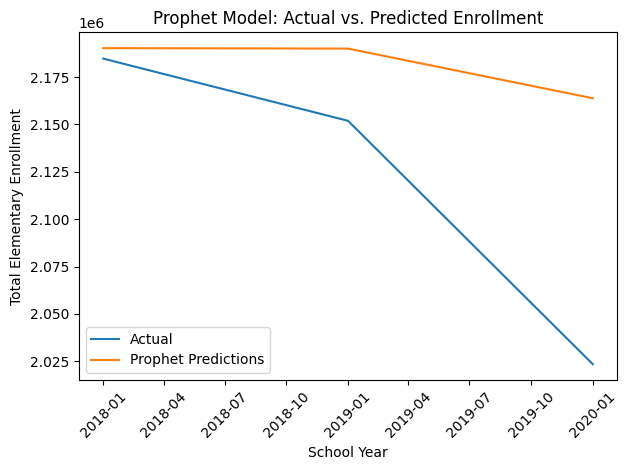

In [89]:
plt.plot(test_prophet.index, test_prophet, label="Actual")
plt.plot(test_prophet.index, prophet_predictions.iloc[len(train_prophet):].values, label="Prophet Predictions")
plt.title("Prophet Model: Actual vs. Predicted Enrollment")
plt.xlabel("School Year")
plt.ylabel("Total Elementary Enrollment")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Prophet model correctly predicted the change in direction. It forecasted that enrollment would peak around 2018/2019 and then begin to decrease into 2020.

### Forecasting

Compare the forecasts of both the ARIMA and Prophet models within a 5-year period.

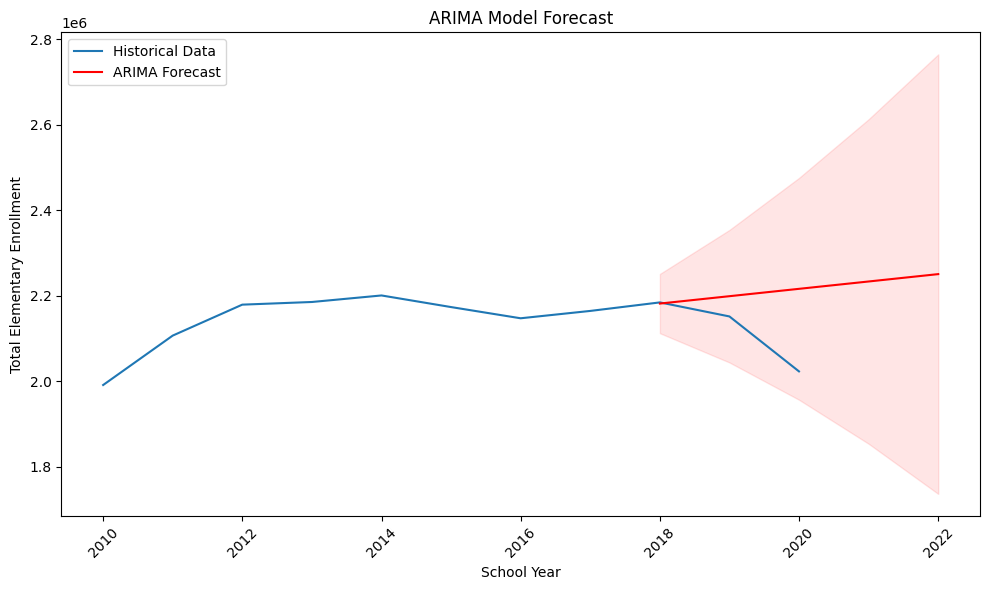

In [91]:
n_forecast = 5
arima_forecast_result = arima_model_fitted.get_forecast(steps=n_forecast)
arima_forecast = arima_forecast_result.predicted_mean
arima_conf_int = arima_forecast_result.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(data_arima.index, data_arima, label="Historical Data")
plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Forecast", color="red")
plt.fill_between(arima_conf_int.index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color="red", alpha=0.1)
plt.title("ARIMA Model Forecast")
plt.xlabel("School Year")
plt.ylabel("Total Elementary Enrollment")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The ARIMA(0,2,0) model projects a smooth, almost linear upward trend. It completely misses the actual downturn that occurred from 2018 to 2020. This plot visually confirms that the ARIMA model was not a good fit for this specific dataset. Its linear assumptions were violated by the real-world data, leading to a forecast that was wrong in both direction and magnitude.

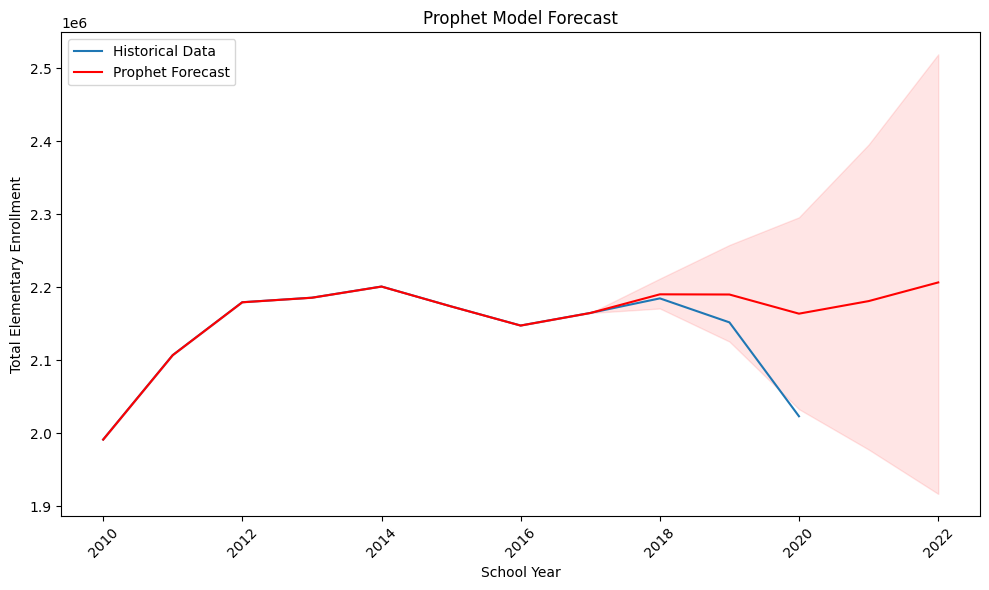

In [93]:
n_forecast = 5
future_prophet = model_prophet_fitted.make_future_dataframe(periods=n_forecast, freq="YS")
forecast_prophet = model_prophet_fitted.predict(future_prophet)

plt.figure(figsize=(10, 6))
plt.plot(data_prophet.index, data_prophet, label="Historical Data")
plt.plot(forecast_prophet["ds"], forecast_prophet["yhat"], label="Prophet Forecast", color="red")
plt.fill_between(forecast_prophet["ds"], forecast_prophet["yhat_lower"], forecast_prophet["yhat_upper"], color="red", alpha=0.1)
plt.title("Prophet Model Forecast")
plt.xlabel("School Year")
plt.ylabel("Total Elementary Enrollment")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Prophet model correctly predicts the downturn from 2018 to 2020. It then forecasts a recovery from 2020 onwards; it identified the trend reversal and provided a forecast that was directionally correct, aligning much better with reality.

In [95]:
arima_comparison_pred_forecast = pd.DataFrame({
    "Original": data_arima,
    "ARIMA Predicted": arima_predictions,
    "ARIMA Forecast": arima_forecast
})

print("ARIMA Original vs. Predicted/Forecasted Values:")
display(arima_comparison_pred_forecast)

ARIMA Original vs. Predicted/Forecasted Values:


,Original,ARIMA Predicted,ARIMA Forecast
2010-01-01,1991593.0,NaN,NaN
2011-01-01,2107115.0,NaN,NaN
2012-01-01,2179502.0,NaN,NaN
2013-01-01,2185742.0,NaN,NaN
2014-01-01,2201004.0,NaN,NaN
2015-01-01,2173848.0,NaN,NaN
2016-01-01,2147640.0,NaN,NaN
2017-01-01,2164851.0,NaN,NaN
2018-01-01,2184758.0,2182062.0,2182062.0
2019-01-01,2151930.0,2199273.0,2199273.0


In [97]:
prophet_comparison_pred_forecast = pd.DataFrame({
    "Original": data_prophet,
    "Prophet Predicted": prophet_predictions,
    "Prophet Forecast": forecast_prophet["yhat"]
})

print("Prophet Original vs. Predicted/Forecasted Values:")
display(prophet_comparison_pred_forecast)

Prophet Original vs. Predicted/Forecasted Values:


,Original,Prophet Predicted,Prophet Forecast
2010-01-01 00:00:00,1991593.0,NaN,NaN
2011-01-01 00:00:00,2107115.0,NaN,NaN
2012-01-01 00:00:00,2179502.0,NaN,NaN
2013-01-01 00:00:00,2185742.0,NaN,NaN
2014-01-01 00:00:00,2201004.0,NaN,NaN
2015-01-01 00:00:00,2173848.0,NaN,NaN
2016-01-01 00:00:00,2147640.0,NaN,NaN
2017-01-01 00:00:00,2164851.0,NaN,NaN
2018-01-01 00:00:00,2184758.0,NaN,NaN
2019-01-01 00:00:00,2151930.0,NaN,NaN
